In [1]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data.db', echo=False)
con = engine.connect()
df_patient = pd.read_sql('select * from patient', con=con)
df_pcr = pd.read_sql('select * from test', con=con)
con.close()

In [2]:
# df.groupby('patient_id')

# Vue générale sur les données patient et pcr :

In [3]:
#informations données patient
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   patient_id     20000 non-null  int64  
 1   given_name     19560 non-null  object 
 2   surname        19575 non-null  object 
 3   street_number  19618 non-null  float64
 4   address_1      19204 non-null  object 
 5   suburb         19788 non-null  object 
 6   postcode       19801 non-null  object 
 7   state          18010 non-null  object 
 8   date_of_birth  17989 non-null  float64
 9   age            16003 non-null  float64
 10  phone_number   19081 non-null  object 
 11  address_2      7893 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.8+ MB


In [4]:
#information données pcr
df_pcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  8800 non-null   int64 
 1   pcr         8800 non-null   object
dtypes: int64(1), object(1)
memory usage: 137.6+ KB


In [5]:
#top 5 rows
df_patient.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
0,221958,matisse,clarke,13.0,rene street,ellenbrook,2527,wa,19710708.0,32.0,08 86018809,westella
1,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown
2,231932,alice,conboy,35.0,mountain circuit,prospect,2305,nsw,19810905.0,22.0,02 20403934,None
3,465838,sienna,craswell,39.0,cumberlegeicrescent,henty,3620,wa,19840809.0,30.0,02 62832318,jodane
4,359178,joshua,bastiaans,144.0,lowrie street,campbell town,4051,nsw,19340430.0,31.0,03 69359594,None


In [6]:
#bottom 5 rows
df_patient.tail()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
19995,368617,abby,None,19.0,john cleland crescent,boyne island,2290,nsw,19570210.0,NaN,02 92489054,glenmore
19996,796658,dale,priest,19.0,bellchambers crescent,hoppers crossing,3033,wa,19590619.0,31.0,07 20549476,None
19997,511885,alessia,mawlai,4.0,miller street,smithfield,3616,tas,NaN,26.0,03 83466737,None
19998,985932,hannah,mason,1.0,halligan place,beaumaris,2443,wa,19140304.0,25.0,04 41125514,None
19999,925217,jack,mcveigh,5.0,alinda place,thornlands,4350,nsw,19230521.0,26.0,07 52535106,None


In [7]:
#Nombre de colonnes et lignes dans les deux dataframes

print(f"Il y a au total {len(df_patient)} lignes et {len(df_patient.columns)} colonnes dans les données Patient.")

print("")

print(f"Il y a au total {len(df_pcr)} lignes et {len(df_pcr.columns)} colonnes dans les données Tests PCR.")

Il y a au total 20000 lignes et 12 colonnes dans les données Patient.

Il y a au total 8800 lignes et 2 colonnes dans les données Tests PCR.


In [8]:
#Les noms des colonnes

print(f"Les colonnes de données patients sont {list(df_patient.columns)}")
print("")
print(f"Les colonnes de données test PCR sont {list(df_pcr.columns)}")

Les colonnes de données patients sont ['patient_id', 'given_name', 'surname', 'street_number', 'address_1', 'suburb', 'postcode', 'state', 'date_of_birth', 'age', 'phone_number', 'address_2']

Les colonnes de données test PCR sont ['patient_id', 'pcr']


In [9]:
#type des colonnes dans les données 
df_patient.dtypes , df_pcr.dtypes

(patient_id         int64
 given_name        object
 surname           object
 street_number    float64
 address_1         object
 suburb            object
 postcode          object
 state             object
 date_of_birth    float64
 age              float64
 phone_number      object
 address_2         object
 dtype: object,
 patient_id     int64
 pcr           object
 dtype: object)

# 1. Données manquantes :

In [10]:
# Nombre total des valeurs de données manquantes par colonne Patient
missing_values_count = df_patient.isnull().sum()
missing_values_count

patient_id           0
given_name         440
surname            425
street_number      382
address_1          796
suburb             212
postcode           199
state             1990
date_of_birth     2011
age               3997
phone_number       919
address_2        12107
dtype: int64

In [11]:
print(" \nPourcentages des valeurs manquantes par colonne dans les données Patient: \n\n", (df_patient.isnull().sum()/len(df_patient))*100)
print(" \nNombre total des valeurs manquantes par colonne dans les données test PCR: \n\n", df_pcr.isnull().sum()) 

 
Pourcentages des valeurs manquantes par colonne dans les données Patient: 

 patient_id        0.000
given_name        2.200
surname           2.125
street_number     1.910
address_1         3.980
suburb            1.060
postcode          0.995
state             9.950
date_of_birth    10.055
age              19.985
phone_number      4.595
address_2        60.535
dtype: float64
 
Nombre total des valeurs manquantes par colonne dans les données test PCR: 

 patient_id    0
pcr           0
dtype: int64


<AxesSubplot:>

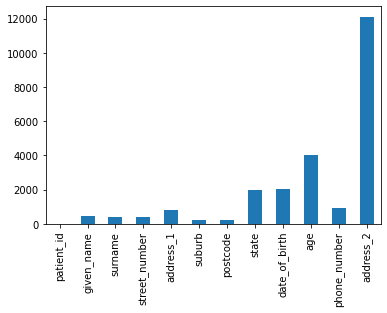

In [13]:
# Nombre total des valeurs de données manquantes par colonne 
patient_nulls = df_patient.apply(lambda x: x.isnull().value_counts()).T[True]
patient_nulls.hist() 
# histogramme des valeurs manquantes
patient_nulls.plot(kind = 'bar')

# Analyse :

In [14]:
#Nous pouvons remarquer d'après les pourcentages dans le tableau et aussi l'histogramme qu'il existe des donnees manquantes
#adresse_2 manque dans presq 60% => la deuxième adresse n'est pas toujours déclarée et c'est logique!
#age manque dans 20% & date_of_birth 10% => Gneralmnt l'age est toujours un bon feature dans les données de santé 
#patient_id 0% , primary key value

# 2.Données incohérentes:

# 2.1.Données Patient:

In [15]:
#nous allons garder les données non null
pat_nonnull=df_patient.dropna()
pat_nonnull

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
0,221958,matisse,clarke,13.0,rene street,ellenbrook,2527,wa,19710708.0,32.0,08 86018809,westella
1,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown
3,465838,sienna,craswell,39.0,cumberlegeicrescent,henty,3620,wa,19840809.0,30.0,02 62832318,jodane
7,832180,jack,renfrey,27.0,osmand street,maribyrnong,2170,qld,19610518.0,31.0,03 15575583,dhurringill
20,421879,callum,nicolle,2.0,mcleod place,walgett,2144,nsw,19340319.0,25.0,03 79802023,marella
...,...,...,...,...,...,...,...,...,...,...,...,...
19976,513727,kane,costigan,1.0,stonehaven crescent,shenton park,2203,nsw,19100707.0,22.0,04 55808760,townview
19979,116167,thomas,matthews,6.0,biddlecombe street,unanderra,4740,nsw,19200108.0,32.0,03 95817460,brentwood vlge
19983,230775,victoria,whiteley,12.0,beasley street,landsborough,2388,nsw,19491217.0,30.0,03 68108604,ponderosa
19985,407822,sarah,matthews,58.0,zox circuit,seven hills,3174,nsw,19241001.0,25.0,08 77093884,lagoon farm


In [23]:
#vérification de duplication dans 'patient_id' colonne
patient_id=df_patient.groupby('patient_id')
occ=0
for name,group in patient_id:
    if len(group)!=1:
        occ+=1
print(f" \nPourcentage des doublants par colonne patient_id : {int((occ/len(patient_id))*100)}%\n\n") 

 
Pourcentage des doublants par colonne patient_id : 1%




In [ ]:
#Commentaires:
#Les données dupliquées ne sont pas identiques
#=> Dans certains cas , le meme patient_id est utilisé dans plusieurs lignes
#=> Cela est due à l'incohérence dans les données (valeurs Nan et NONE) comme typos, information manquante..

In [94]:
# valeurs uniques de la colonne 'states'
states = pat_nonnull['state'].unique()
states.sort()
states

array(['act', 'ai', 'ndw', 'nfsw', 'nfw', 'ns', 'nsa', 'nsc', 'nsd',
       'nsew', 'nsgs', 'nsjh', 'nsn', 'nss', 'nssw', 'nsw', 'nsxw', 'nt',
       'qld', 'qle', 'qlr', 'qls', 'qod', 'sa', 'ta', 'tab', 'tas',
       'vcci', 'vic', 'vie', 'vif', 'vq', 'wa'], dtype=object)

In [96]:
df_patient.columns

Index(['patient_id', 'given_name', 'surname', 'street_number', 'address_1',
       'suburb', 'postcode', 'state', 'date_of_birth', 'age', 'phone_number',
       'address_2'],
      dtype='object')

In [99]:
# vérification de la cohérence entre les colonnes 'date_of_birth' and 'age'
df_age=df_patient[['date_of_birth', 'age']]
df_age=df_age.dropna()
df_age

,date_of_birth,age
0,19710708.0,32.0
1,19120921.0,34.0
2,19810905.0,22.0
3,19840809.0,30.0
4,19340430.0,31.0
...,...,...
19992,19720229.0,25.0
19993,19211111.0,34.0
19996,19590619.0,31.0
19998,19140304.0,25.0


In [110]:
#date : année/mois/jours
#fonction de calcul d'age à partir de date de naissance
from datetime import date
def calculer_age(born):
    year=int(born//10000)
    today = date.today()
    return float(today.year - year)

In [111]:
df_age['Age_date_of_birth'] = df_age.apply(lambda x: calculer_age(x['date_of_birth']), axis=1)
df_age

,date_of_birth,age,age_real
0,19710708.0,32.0,49.0
1,19120921.0,34.0,108.0
2,19810905.0,22.0,39.0
3,19840809.0,30.0,36.0
4,19340430.0,31.0,86.0
...,...,...,...
19992,19720229.0,25.0,48.0
19993,19211111.0,34.0,99.0
19996,19590619.0,31.0,61.0
19998,19140304.0,25.0,106.0


In [115]:
#vérifier si les deux ages sont differents
check = df_age[df_age.age != df_age.age_real]
check

,date_of_birth,age,age_real
0,19710708.0,32.0,49.0
1,19120921.0,34.0,108.0
2,19810905.0,22.0,39.0
3,19840809.0,30.0,36.0
4,19340430.0,31.0,86.0
...,...,...,...
19992,19720229.0,25.0,48.0
19993,19211111.0,34.0,99.0
19996,19590619.0,31.0,61.0
19998,19140304.0,25.0,106.0


In [118]:
print(" \nPourcentage de non égalité entre Ages calculés de date de naissance et age dans les données : \n\n", (len(check)/len(df_age))*100)

 
Pourcentages différence entre ages calculés de date de naissance et age : 

 99.2634285317212


In [119]:
#Commentaires :
#faut vérifier lequel des deux age nous allons utilser dans la suite de processus data science !!

In [120]:
#verification de nombre de chiffre dans le numéro phone
df_number=df_patient[['phone_number']]
df_number=df_number.dropna()
df_number

,phone_number
0,08 86018809
1,02 97793152
2,02 20403934
3,02 62832318
4,03 69359594
...,...
19995,02 92489054
19996,07 20549476
19997,03 83466737
19998,04 41125514


In [125]:
#vérifier le nombre de chiffres dans le numéro
df_number['phone_length'] = df_number.apply(lambda x: len(str(x['phone_number'])), axis=1)
df_number['phone_length'].value_counts()

11    19081
Name: phone_length, dtype: int64

# Analyse:

In [ ]:
#Il existe une incohérence entre les colonnes "dat_of_birth" et "age"

# 2.2.Données Test PCR

In [127]:
df_pcr['pcr'].value_counts()

N           3482
Negative    3134
Positive    1283
P            901
Name: pcr, dtype: int64

# Analyse:

In [131]:
#Il existe deux formats de representation pour chaque label 'test positif' ou 'test négatif'
#N=Negative
#P=Positive
#une simple transformation sur la colonne 'pcr' suffit pour généralisr les labels